In [1]:
import pandas as pd

In [2]:
path = 'C:/Users/shiva/2015-01-01-16.json.gz'
df = pd.read_json(path, compression = "gzip", lines = True)

In [3]:
# df.to_csv('data.csv')

In [4]:
df1 = df.loc[df['type'] == 'IssuesEvent']
df2 = pd.json_normalize(df1['payload'])

In [5]:
# df2.to_csv('payload_data.csv')

In [19]:
df2.shape

(549, 83)

In [6]:
row_num = df1.iloc[112]

row_num['payload']

{'action': 'closed',
 'issue': {'url': 'https://api.github.com/repos/itzg/dockerfiles/issues/8',
  'labels_url': 'https://api.github.com/repos/itzg/dockerfiles/issues/8/labels{/name}',
  'comments_url': 'https://api.github.com/repos/itzg/dockerfiles/issues/8/comments',
  'events_url': 'https://api.github.com/repos/itzg/dockerfiles/issues/8/events',
  'html_url': 'https://github.com/itzg/dockerfiles/issues/8',
  'id': 53222089,
  'number': 8,
  'title': "[minecraft-server] server.properties gets overwritten with subsequent 'docker start's",
  'user': {'login': 'itzg',
   'id': 988985,
   'avatar_url': 'https://avatars.githubusercontent.com/u/988985?v=3',
   'gravatar_id': '',
   'url': 'https://api.github.com/users/itzg',
   'html_url': 'https://github.com/itzg',
   'followers_url': 'https://api.github.com/users/itzg/followers',
   'following_url': 'https://api.github.com/users/itzg/following{/other_user}',
   'gists_url': 'https://api.github.com/users/itzg/gists{/gist_id}',
   'starred

In [7]:
df3 = pd.json_normalize(df2['issue.labels'])

In [8]:
# df3.to_csv('labels.csv')

In [9]:
df4 = df3.iloc[:,[0]]

df4.columns = ['label']

df4 = df4.dropna()

In [10]:
# df4.to_csv('labels.csv')

In [11]:
df5 = pd.json_normalize(df4['label'])

df5 = df5[['name']]

In [12]:
# converting to lowercase

df5['name'] = df5['name'].astype(str).str.lower()

# converting to tokens

from nltk.tokenize import RegexpTokenizer

regexp = RegexpTokenizer('\w+')

df5['name_token']=df5['name'].apply(regexp.tokenize)

import nltk
nltk.download('stopwords')

from nltk.corpus import stopwords

# stopwords

stopwords1 = nltk.corpus.stopwords.words("english")

my_stopwords_doctor_notes = ['chat','message','materno','problems','concerns','mindful','esp','and','enc','patient','her','continue','the','for','she','with','app','baby','daily','call','plenty','appt','office','advised']
stopwords1.extend(my_stopwords_doctor_notes)

df5['name_token'] = df5['name_token'].apply(lambda x: [item for item in x if item not in stopwords1])

# infrequent words

df5['name_str'] = df5['name_token'].apply(lambda x: ' '.join([item for item in x if len(item)>2]))

# creating list of words

all_words_name = ' '.join([word for word in df5['name_str']])

# tokenizing all words

tokenized_words_name = nltk.tokenize.word_tokenize(all_words_name)

# frequency distribution

from nltk.probability import FreqDist

fdist_name = FreqDist(tokenized_words_name)

df5['name_fdist'] = df5['name_token'].apply(lambda x: ' '.join([item for item in x if fdist_name[item] >= 1]))
                                                                                                    
from nltk.tokenize import word_tokenize
from nltk.probability import FreqDist

nltk.download('punkt')
                                     
all_words_names = ' '.join([word for word in df5['name_fdist']])                                                                                                                                                                                                                                                                                         


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\shiva\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\shiva\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


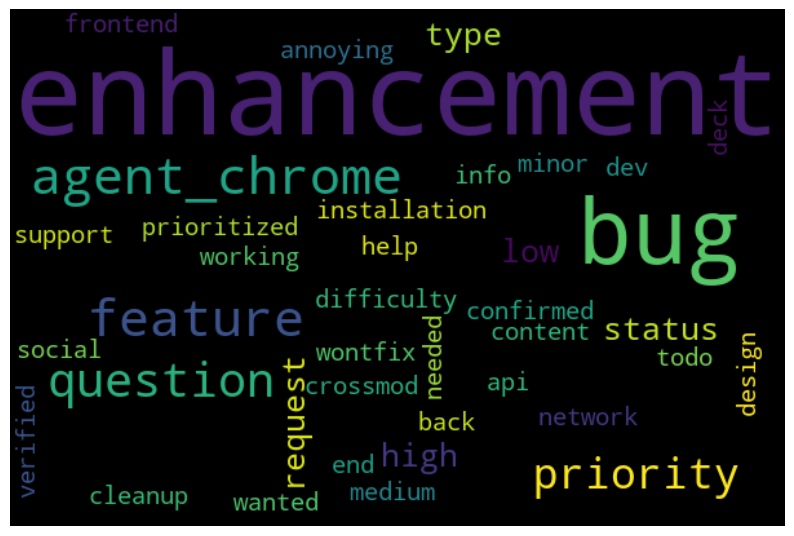

In [13]:
    
# wordcloud

%matplotlib inline
import matplotlib.pyplot as plt
from wordcloud import WordCloud

wordcloud = WordCloud(width=600, 
                     height=400, 
                     random_state=2, 
                     max_font_size=100).generate(all_words_names)

plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off');

In [14]:
# fd table                                                                                               
                                                                                                    
words = nltk.word_tokenize(all_words_names)
fd = FreqDist(words)

fd.tabulate(3)  

enhancement         bug     feature 
         72          40           6 


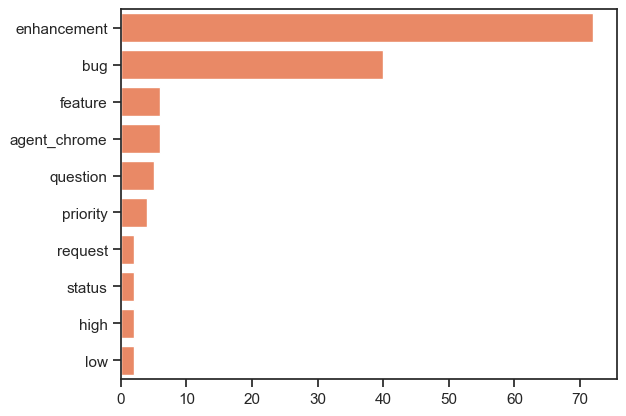

In [15]:
# fd plot

# Obtain top 10 words
top_10 = fd.most_common(10)

# Create pandas series to make plotting easier
fdist = pd.Series(dict(top_10))

import seaborn as sns
sns.set_theme(style="ticks")

sns.barplot(y=fdist.index, x=fdist.values, color='coral');     